In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression


In [53]:
bigrams = pd.read_csv("bigram_count.csv")
df = bigrams[pd.notnull(bigrams["score_0"])]
bigrams.head()

,custom_id,"(000,jobs)","(100,days)","(116th,congress)","(2019,congressional)","(21st,century)","(6,million)","(9,11)","(abortion,survivors)","(access,quality)",...,"(watch,live)","(white,house)","(women,act)",name,party,position,score_0,score_115,score_116,state
0,263,0,2,0,0,1,0,0,0,0,...,0,2,0,Abby Finkenauer,D,H,0.000000,NaN,0.000000,Iowa 1st District
1,516,0,7,2,2,3,0,0,0,1,...,4,0,0,Abigail Spanberger,D,H,0.000000,NaN,0.000000,Virginia 7th District
2,242,1,0,0,1,0,0,0,0,0,...,1,1,0,Adam Kinzinger,R,H,0.934426,0.989583,0.730769,Illinois 16th District
3,142,0,0,0,0,0,0,3,0,0,...,0,9,0,Adam Schiff,D,H,0.178862,0.229167,0.000000,California 28th District
4,528,0,0,0,1,0,0,0,0,2,...,0,0,1,Adam Smith,D,H,0.111111,0.144444,0.000000,Washington 9th District


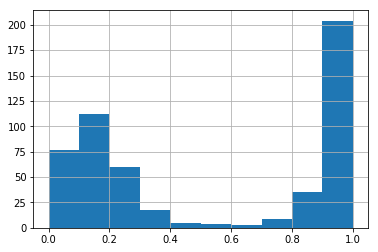

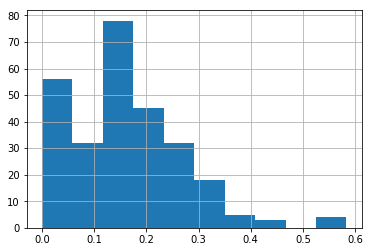

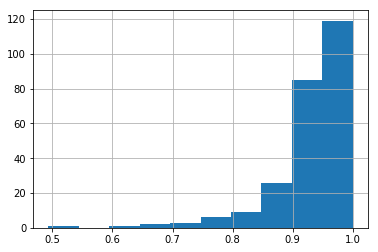

In [174]:
df["score_0"].hist()
plt.show()
df[df["party"]=="D"]["score_0"].hist()
plt.show()
df[df["party"]=="R"]["score_0"].hist()
plt.show()

In [172]:
df[df["party"=="D"]]

KeyError: False

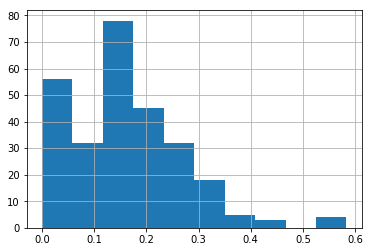

In [20]:
bigrams[bigrams["party"] == "D"]["score_0"].hist()
plt.show()

In [91]:
low = np.round(np.quantile(df["score_0"].values, 0.25), 3)
mid = np.round(np.quantile(df["score_0"].values, 0.50), 3)
upper = np.round(np.quantile(df["score_0"].values, 0.75), 3)

In [99]:
df.loc[df[df["score_0"] <= low].index, "label"] = 0
df.loc[df[(df["score_0"] > low) & (df["score_0"] <= mid)].index, "label"] = 1
df.loc[df[(df["score_0"] > mid) & (df["score_0"] <= upper)].index, "label"] = 2
df.loc[df[df["score_0"] > upper].index, "label"] = 3

In [108]:
bigs = df.columns[1:201]

In [149]:
test = df.iloc[:400]
valid = df.iloc[400:]

X = test[bigs]
Y = test["party"]

x = valid[bigs]
y = valid["party"]

model = LogisticRegression()

In [165]:
model.fit(df[bigs], df["party"])
labs = model.predict(df[bigs])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [166]:
sum(labs != df["party"])

3

In [156]:
Y.head()

0    D
1    D
2    R
3    D
4    D
Name: party, dtype: object

In [157]:
y.head()

410    R
411    R
412    D
413    R
414    R
Name: party, dtype: object